---

<div style="text-align: justify;">

# Informe de Trabajo sobre Estimación de Tipo de Pokémon con distintos modelos de clasificación - Ejercicio 3, 4, 5 y 6

## Introducción:

El objetivo del trabajo es realizar un análisis detallado de un conjunto de datos que contiene información sobre distintos Pokémon. Se busca explorar y comprender las características de los Pokémon, así como identificar patrones y tendencias en sus atributos. Además, se pretende aplicar técnicas de visualización y modelado para obtener información valiosa sobre la relación entre los atributos de los Pokémon y sus tipos.

</div>

----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import collections
import pydotplus
import re
import subprocess

from sklearn import metrics
from sklearn.model_selection import (
    train_test_split, GridSearchCV
)
from sklearn.tree import (
    DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
)
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, 
    precision_score, recall_score, ConfusionMatrixDisplay
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer

from graphviz import Source
from IPython.display import Image, SVG

In [2]:
warnings.filterwarnings('ignore')

In [3]:
pokedex = pd.read_csv('PokemonDB.csv')
pokedex

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
1185,Chi-Yu,Dark,55,80,80,135,120,100
1186,Roaring Moon,Dragon,105,139,71,55,101,119
1187,Iron Valiant,Fairy,74,130,90,120,60,116
1188,Koraidon,Fighting,100,135,115,85,100,135


In [4]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1190 non-null   object
 1   Type     1190 non-null   object
 2   HP       1190 non-null   int64 
 3   Attack   1190 non-null   int64 
 4   Defense  1190 non-null   int64 
 5   Sp. Atk  1190 non-null   int64 
 6   Sp. Def  1190 non-null   int64 
 7   Speed    1190 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 74.5+ KB


In [5]:
colors = {
    'Normal': '#A8A77A',
    'Fire': '#EE8130',
    'Water': '#6390F0',
    'Electric': '#F7D02C',
    'Grass': '#7AC74C',
    'Ice': '#96D9D6',
    'Fighting': '#C22E28',
    'Poison': '#A33EA1',
    'Ground': '#E2BF65',
    'Flying': '#A98FF3',
    'Psychic': '#F95587',
    'Bug': '#A6B91A',
    'Rock': '#B6A136',
    'Ghost': '#735797',
    'Dragon': '#6F35FC',
    'Dark': '#705746',
    'Steel': '#B7B7CE',
    'Fairy': '#D685AD',
}

#### Histograma de Tipos de Pokemon ####

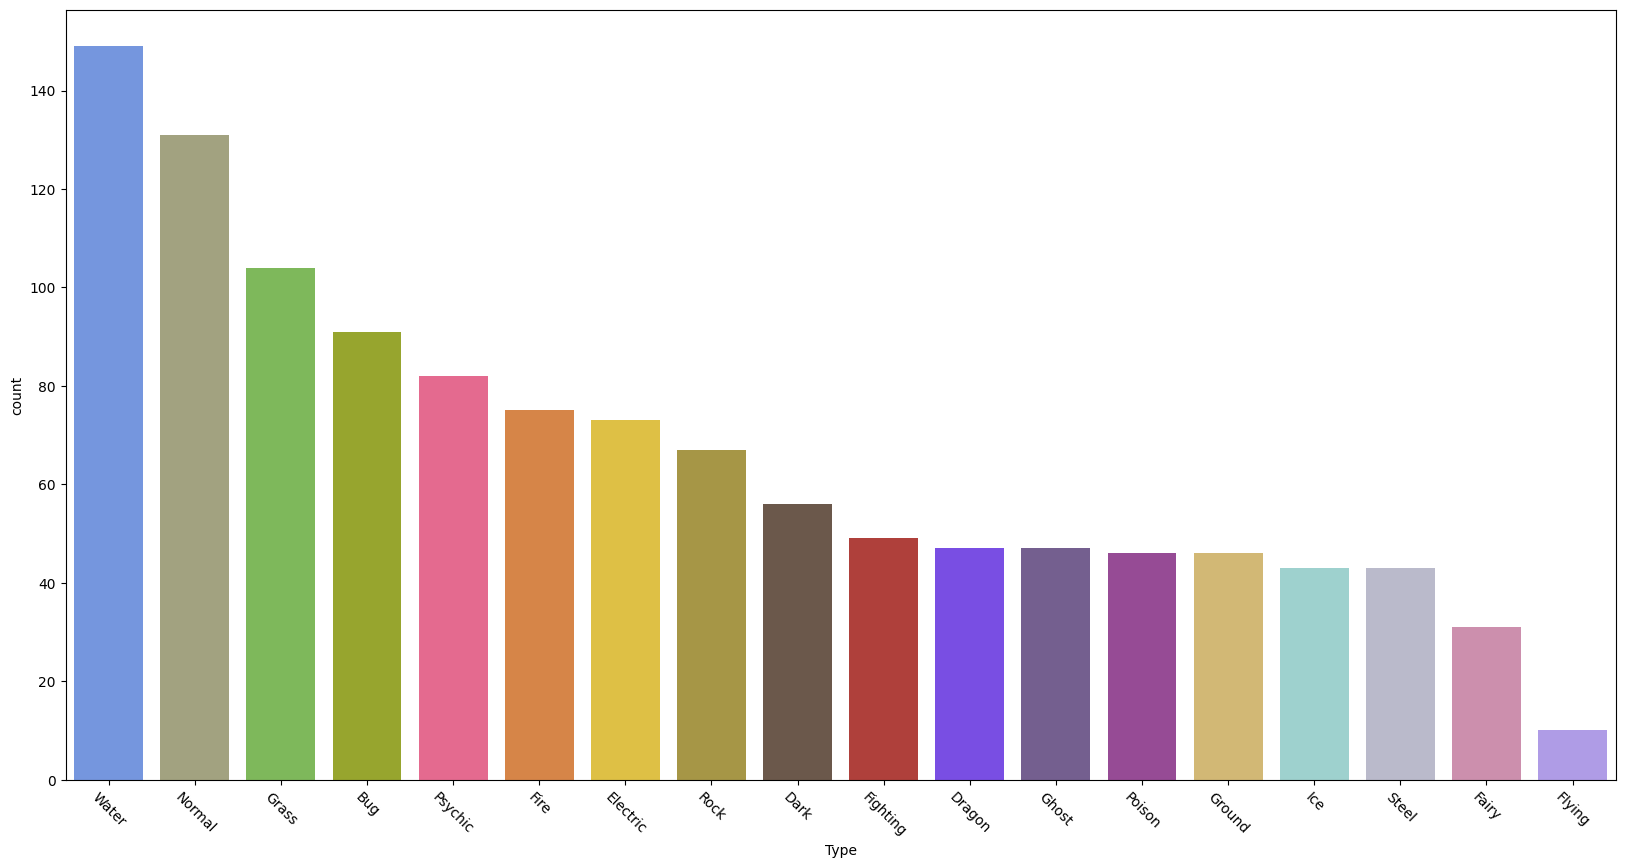

In [6]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Type', data=pokedex, palette=colors, order=pokedex['Type'].value_counts().index)
plt.xticks(rotation=-45)
plt.show()

<div style="text-align: justify;">



Se nota una distribución dispar entre los tipos de Pokémon, siendo los más comunes los de tipo <span style="color: #6890F0;">Agua</span>, <span style="color: #A8A878;">Normal</span> y <span style="color: #78C850;">Hierba</span>. Por otro lado, los tipos más raros son los de tipo <span style="color: #B8B8D0;">Acero</span>, <span style="color: #EE99AC;">Hada</span> y <span style="color: #A890F0;">Volador</span>. Esto indica que el dataset no está nivelado.

</div>

## Análisis de estadísticas ##

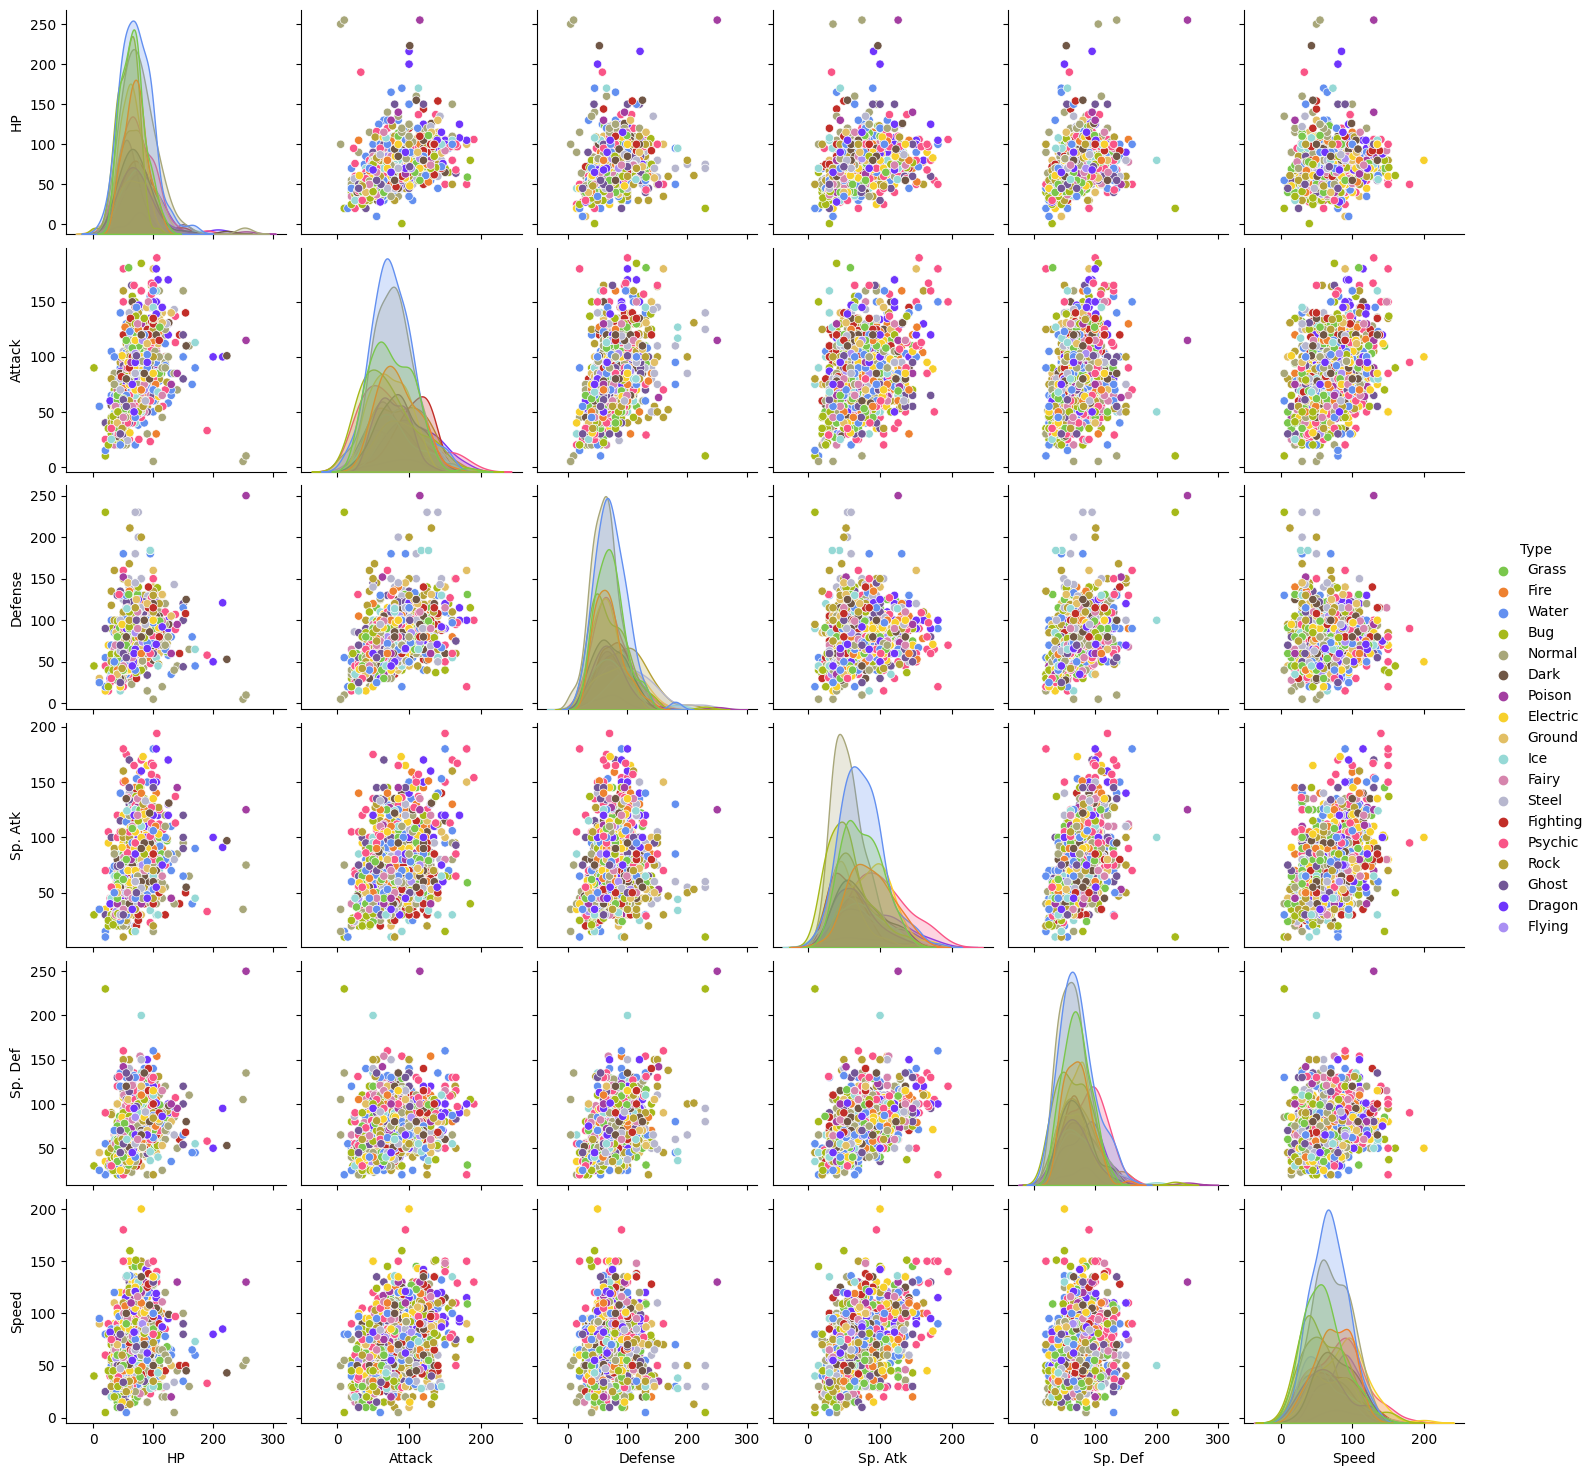

In [7]:
sns.pairplot(pokedex, hue="Type", palette=colors)

### HP ###

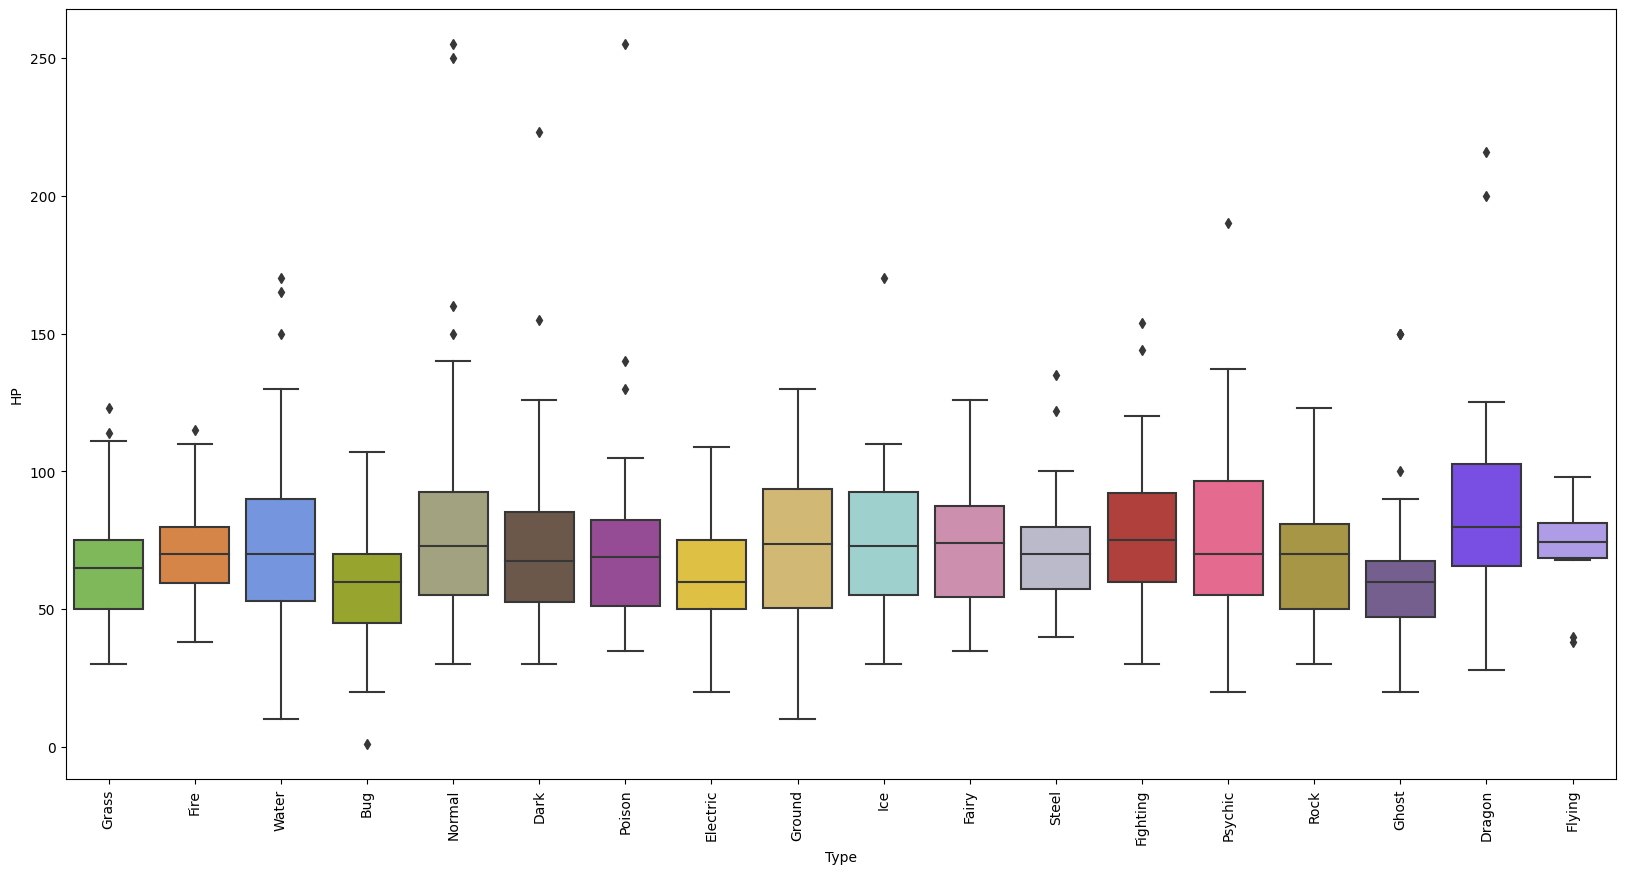

In [8]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Type', y='HP', data=pokedex, palette=colors)
plt.xticks(rotation=90)
plt.show()


<div style="text-align: justify;">
Los Pokémon de tipo <span style="color: #7038F8;">Dragón</span> son aquellos con un HP más alto, lo que indica que son los que presentan más puntos de vida. Por otro lado, los Pokémon de tipo <span style="color: #A8B820;">Bicho</span> y tipo <span style="color: #705898;">Fantasma</span> son los que tienen un HP más bajo, indicando que son los que menos puntos tienen.

</div>

### Ataque ###

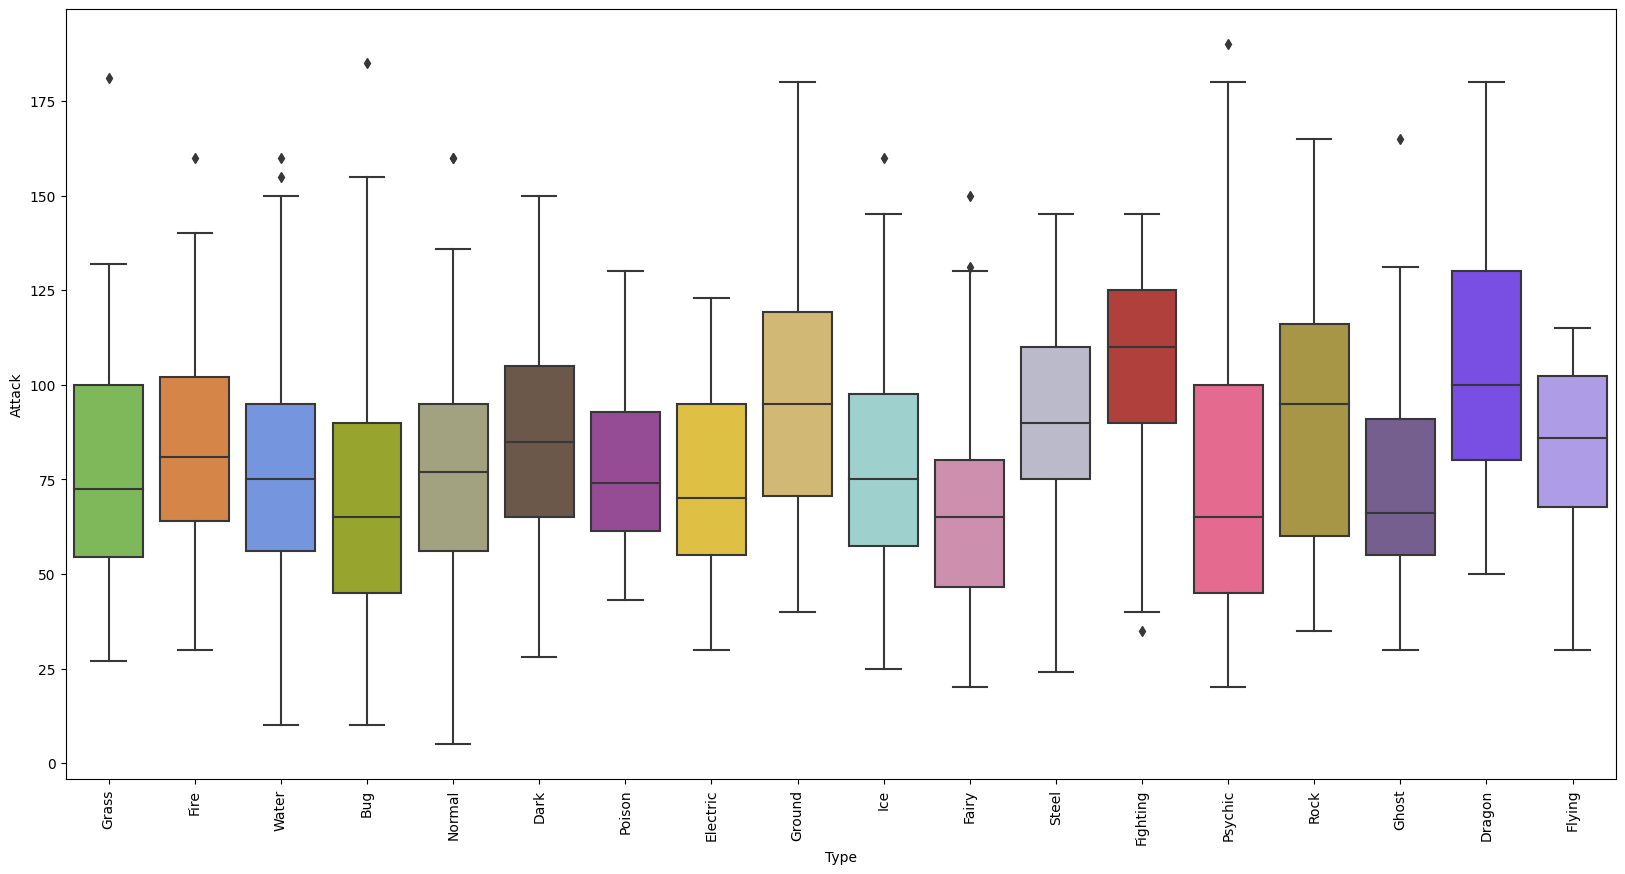

In [9]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Type', y='Attack', data=pokedex, palette=colors)
plt.xticks(rotation=90)
plt.show()


<div style="text-align: justify;">
Los Pokémon de tipo <span style="color: #7038F8;">Dragón</span> y tipo <span style="color: #C03028;">Lucha</span> son aquellos con un ataque más alto, lo que indica que son los más fuertes. Por otro lado, los Pokémon de tipo <span style="color: #A8B820;">Bicho</span>, <span style="color: #705898;">Fantasma</span> y <span style="color: #EE99AC;">Hada</span> son los que tienen un ataque más bajo, indicando que son los más débiles.

</div>

### Defensa ###

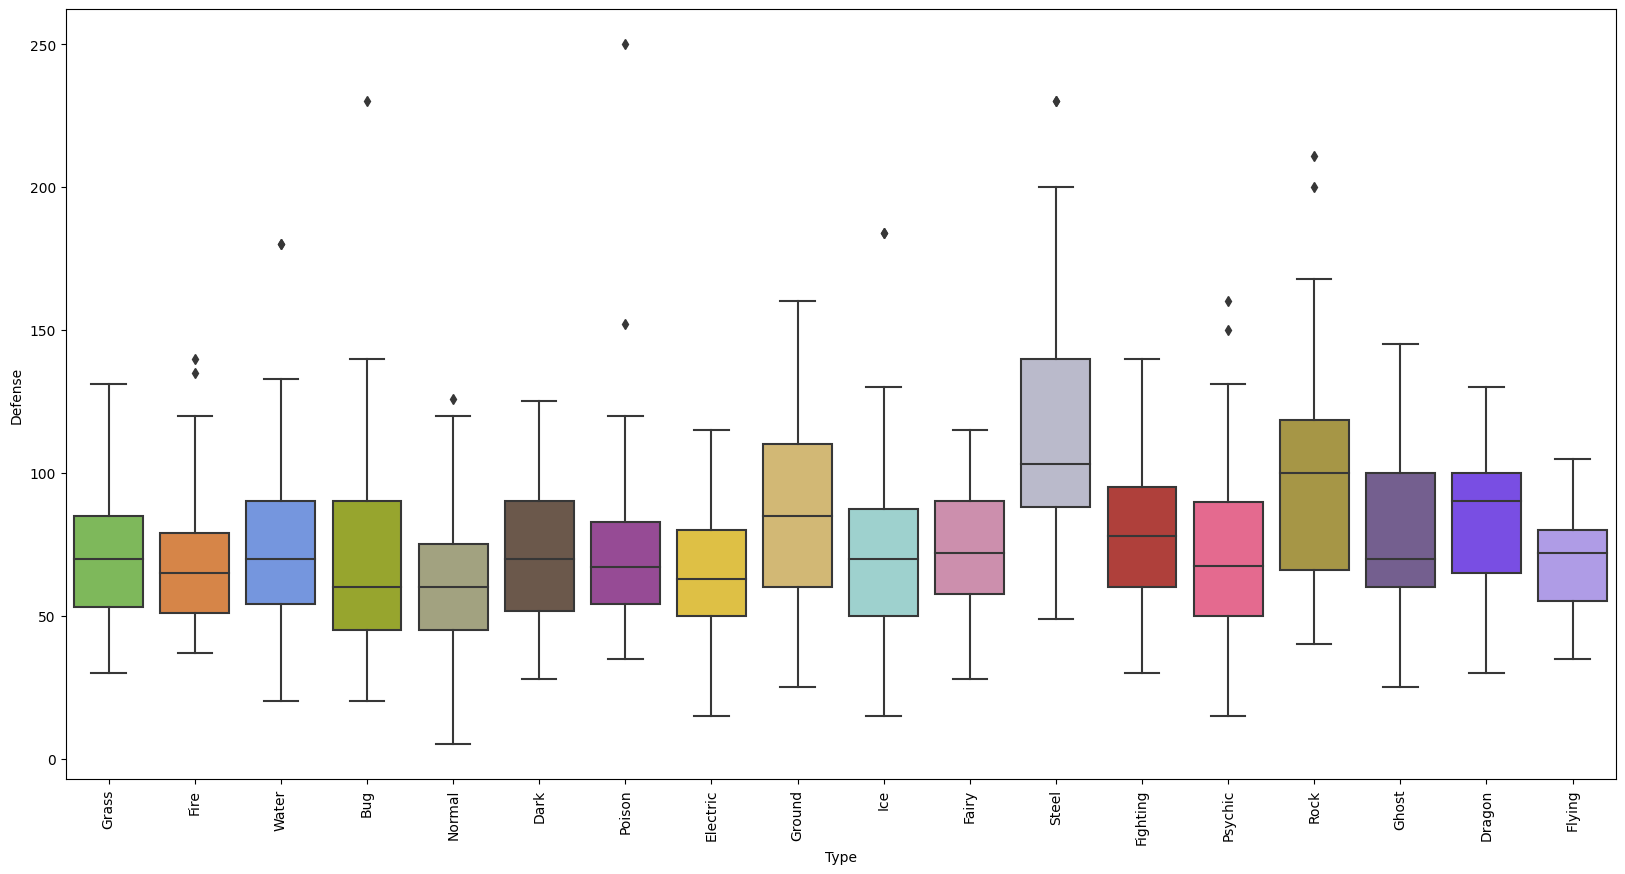

In [10]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Type', y='Defense', data=pokedex, palette=colors)
plt.xticks(rotation=90)
plt.show()


<div style="text-align: justify;">
Los Pokémon de tipo <span style="color: #B8B8D0;">Acero</span> y tipo <span style="color: #B8A038;">Roca</span> son aquellos con una defensa más alta, lo que indica que son los más resistentes. Por otro lado, los Pokémon de tipo <span style="color: #A8B820;">Bicho</span> y <span style="color: #A8A878;">Normal</span> son los que tienen una defensa más baja, indicando que son los menos resistentes frente a ataques.

</div>

### Ataque especial ###

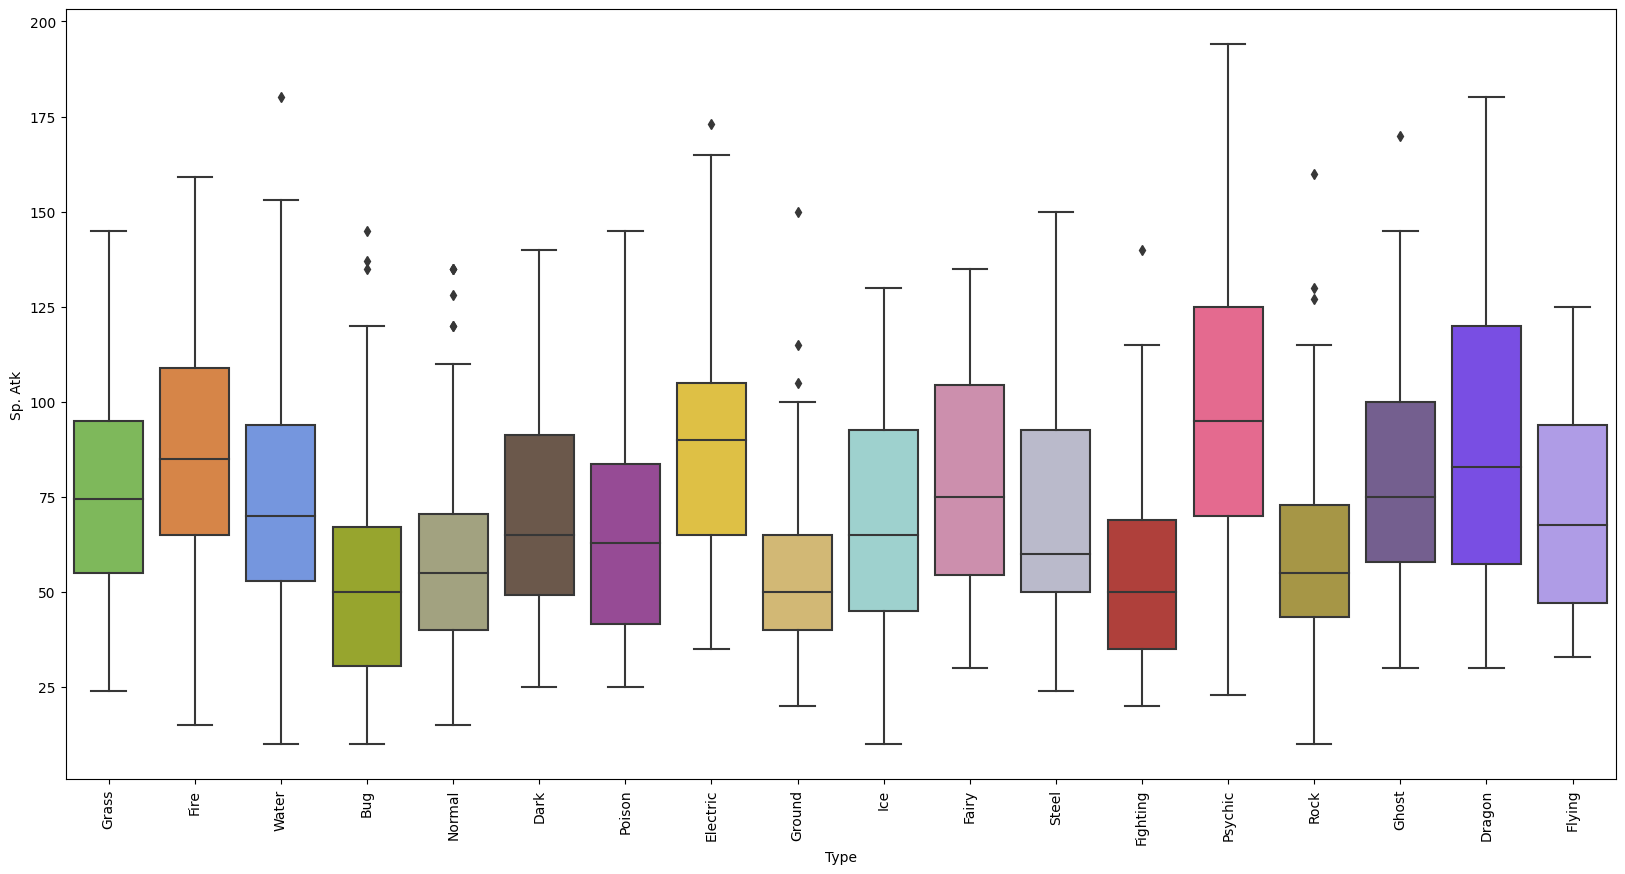

In [11]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Type', y='Sp. Atk', data=pokedex, palette=colors)
plt.xticks(rotation=90)
plt.show()


<div style="text-align: justify;">
Los Pokémon de tipo <span style="color: #7038F8;">Dragón</span> y tipo <span style="color: #F85888;">Psíquico</span> son aquellos con un ataque especial más alto. Por otro lado, los Pokémon de tipo <span style="color: #A8B820;">Bicho</span>, <span style="color: #E0C068;">Tierra</span> y <span style="color: #C03028;">Lucha</span> son los que tienen un ataque especial más bajo.

</div>

### Defensa especial ###

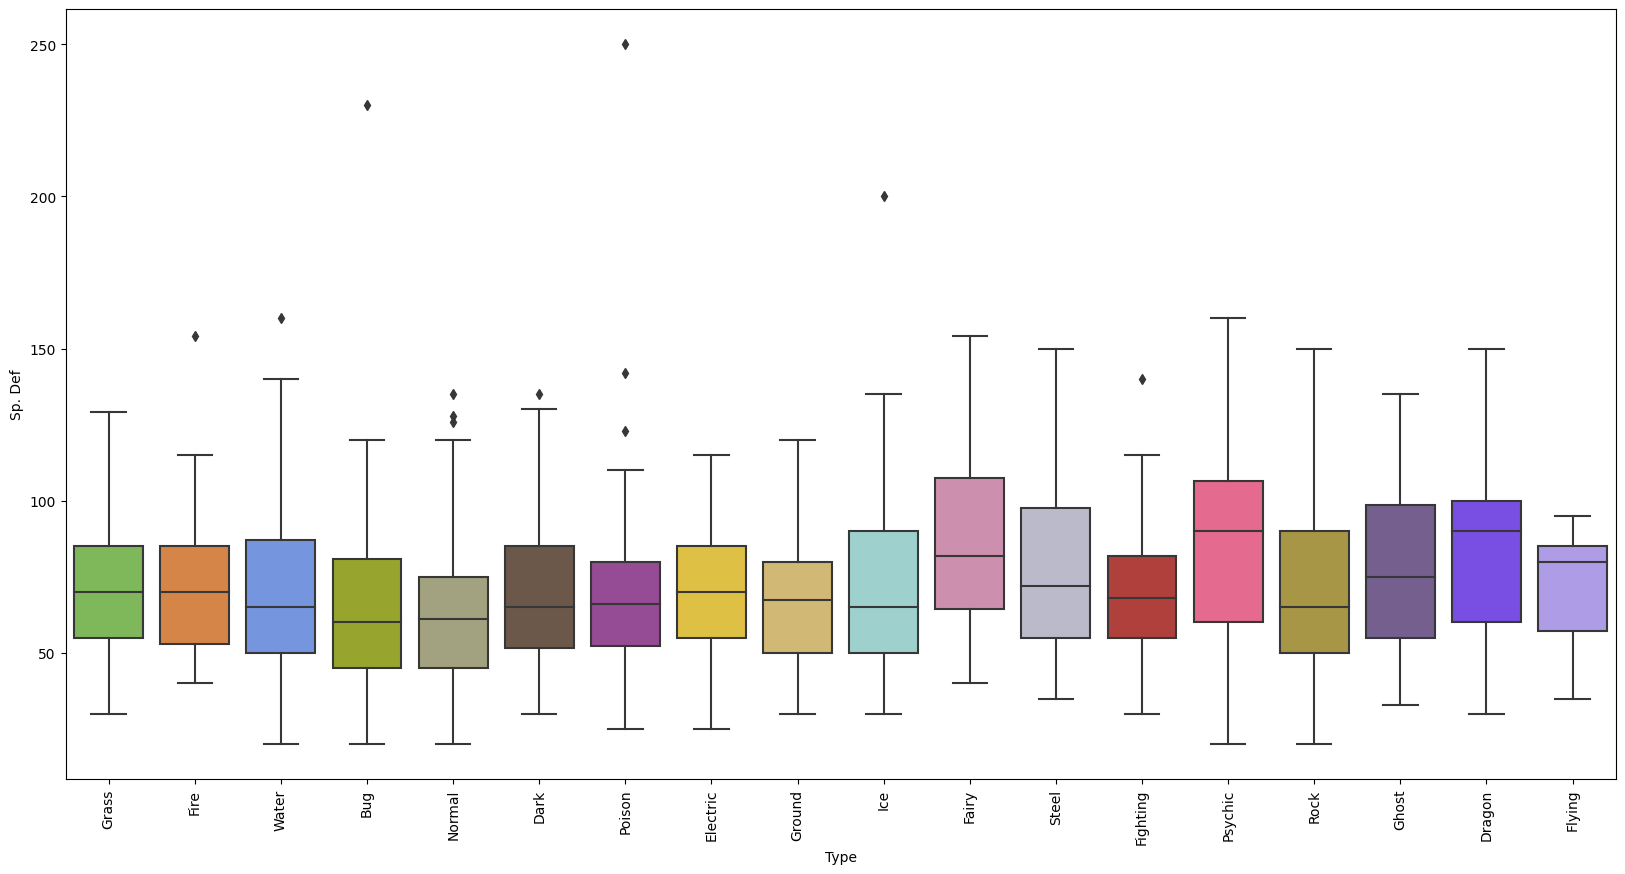

In [12]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Type', y='Sp. Def', data=pokedex, palette=colors)
plt.xticks(rotation=90)
plt.show()

<div style="text-align: justify;">
No se notan variaciones significativas en la defensa especial de los Pokémon.

</div>

### Velocidad ###

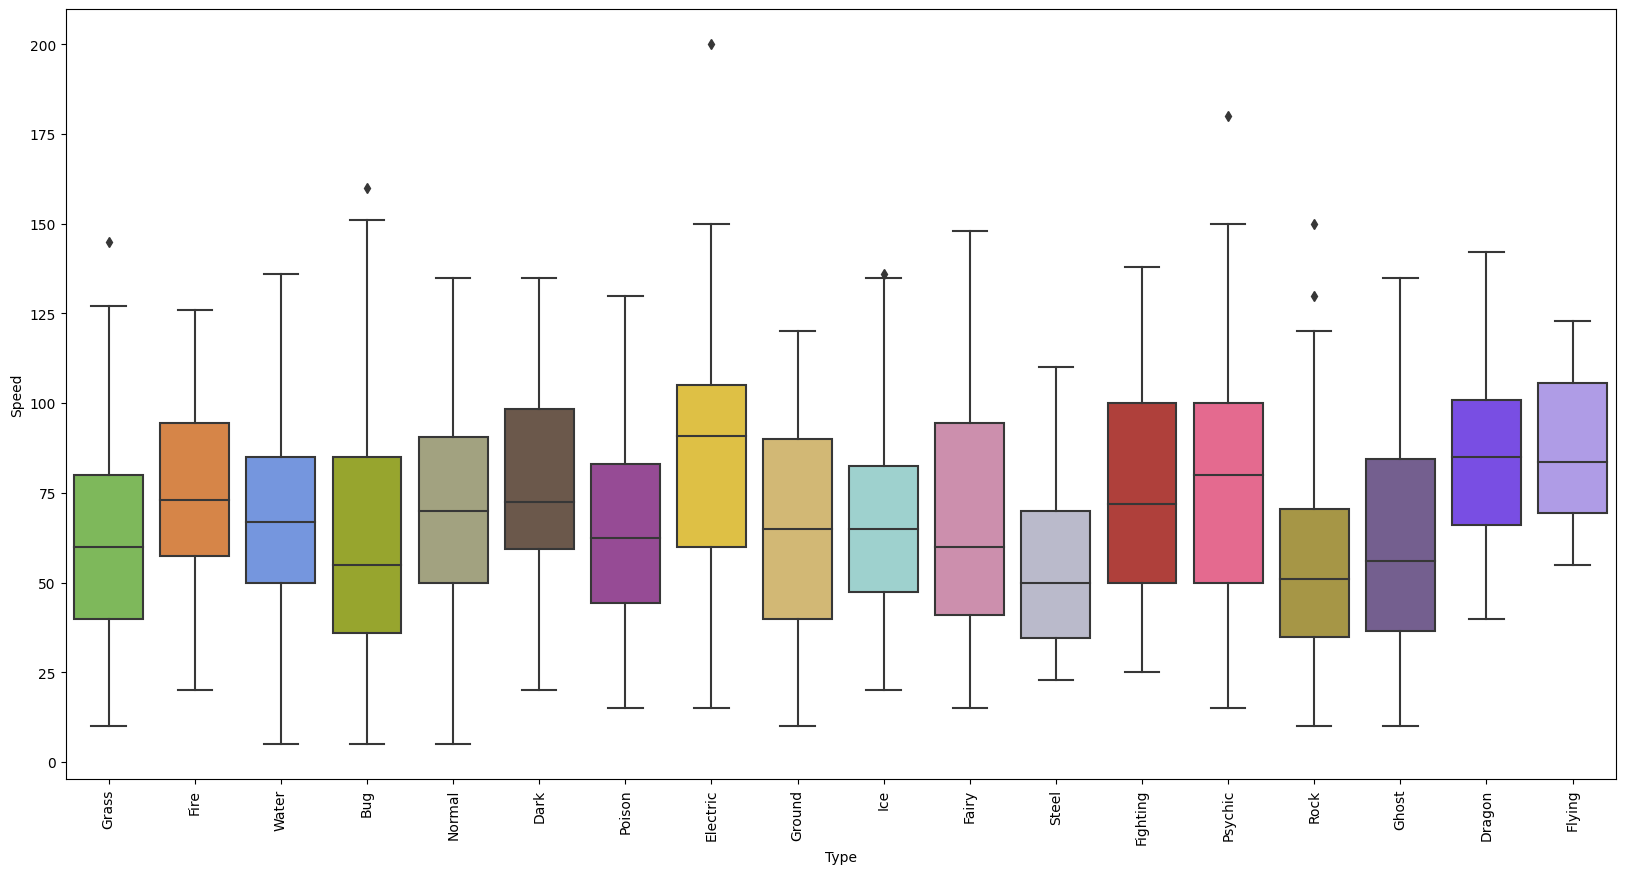

In [13]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Type', y='Speed', data=pokedex, palette=colors)
plt.xticks(rotation=90)
plt.show()


<div style="text-align: justify;">
Los Pokémon de tipo <span style="color: #F8D030;">Eléctrico</span> son significativamente más rápidos que el resto, mientras que en el extremo más lento se encuentran los Pokémon de tipo <span style="color: #B8B8D0;">Acero</span> y <span style="color: #B8A038;">Roca</span>.

</div>

## Árbol de decisión ##

In [14]:
clases_pokemon_con_emojis = {
    'Normal': 'Normal 🧡',
    'Fire': 'Fire 🔥',
    'Water': 'Water 💧',
    'Electric': 'Electric ⚡',
    'Grass': 'Grass 🌿',
    'Ice': 'Ice ❄️',
    'Fighting': 'Fighting 🥊',
    'Poison': 'Poison ☠️',
    'Ground': 'Ground 🏜️',
    'Flying': 'Flying 🦅',
    'Psychic': 'Psychic 🧠',
    'Bug': 'Bug 🐞',
    'Rock': 'Rock 🪨',
    'Ghost': 'Ghost 👻',
    'Dragon': 'Dragon 🐉',
    'Dark': 'Dark 🌑',
    'Steel': 'Steel 🛡️',
    'Fairy': 'Fairy 🧚'
}

#### Entrenando con una distribución 80-20 

Mejores hiperparámetros: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}


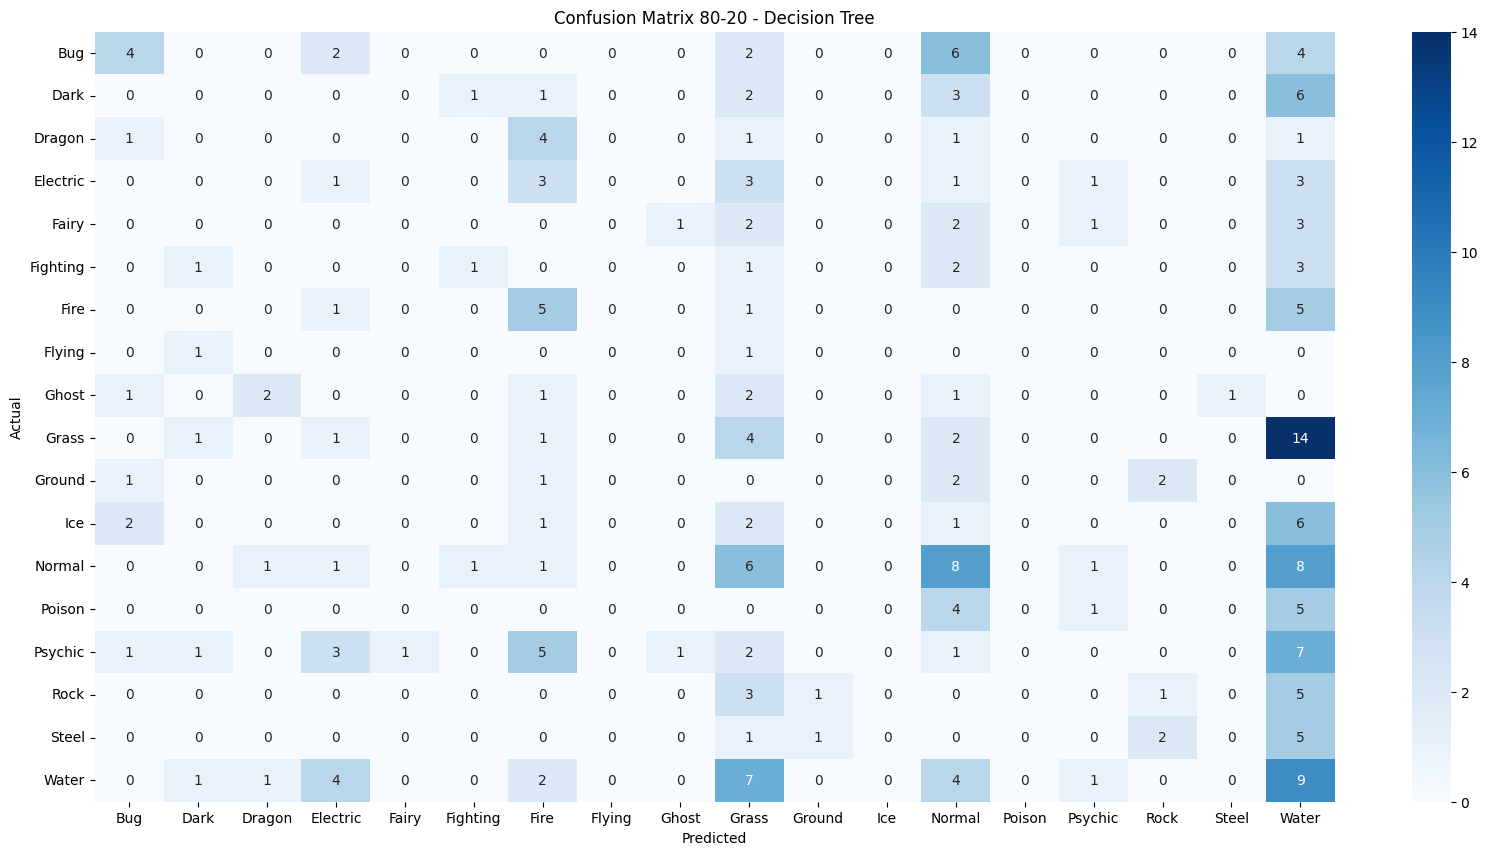

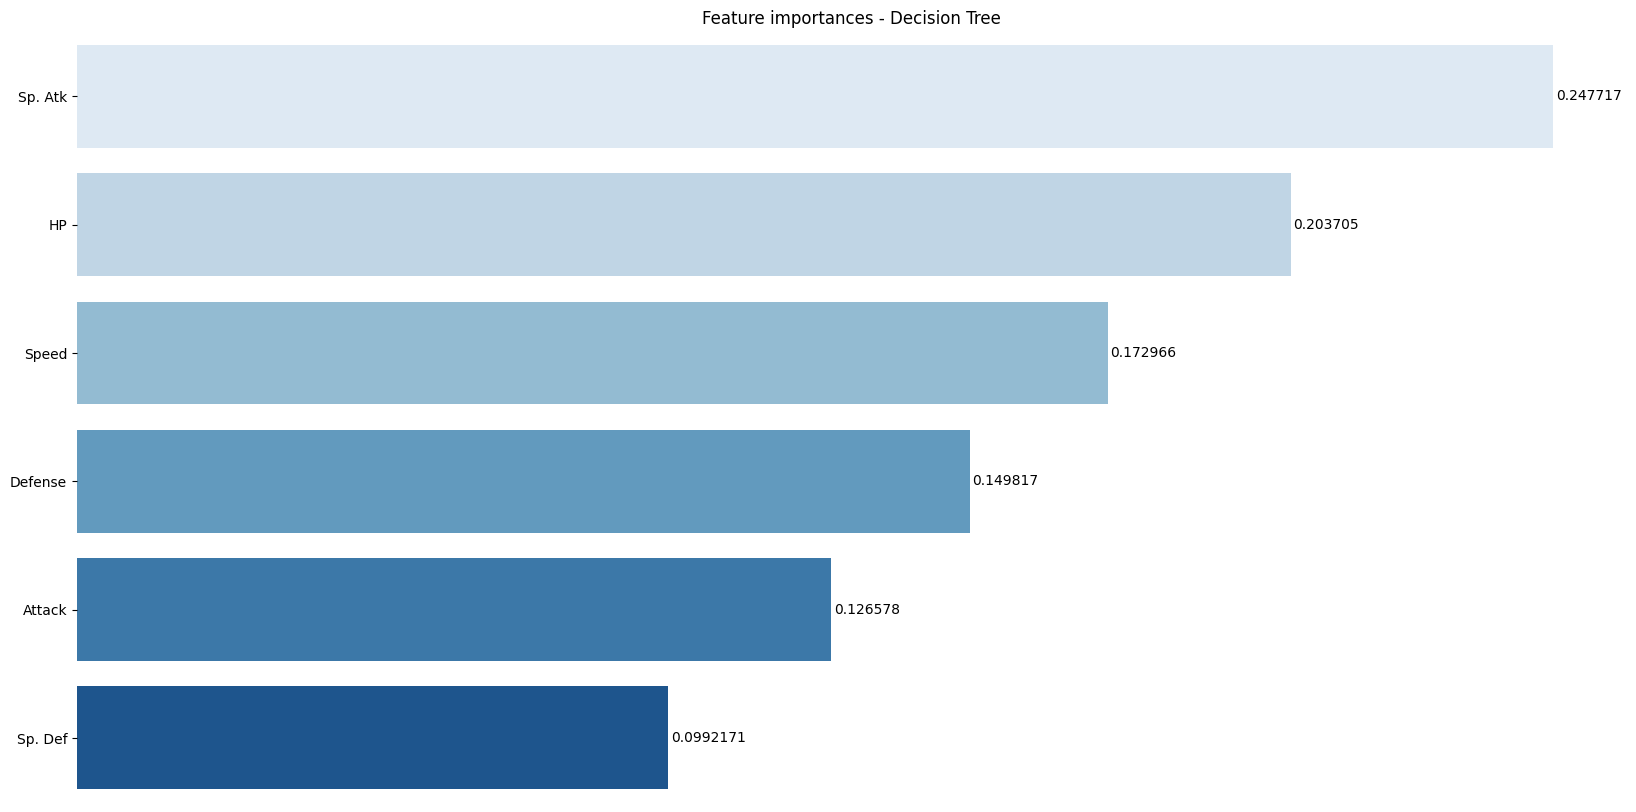

Accuracy: 0.13865546218487396
F1 Score: 0.11058923095511182


In [15]:
x = np.array(pokedex[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])
y = np.array(pokedex['Type'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [x for x in range(5, 16)],
    'min_samples_leaf': [x for x in range(1, 11)],
    'min_samples_split': [2, 5, 10],
}

tree_clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(tree_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

best_tree_clf = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'], random_state=42)
best_tree_clf.fit(x_train, y_train)

y_pred = best_tree_clf.predict(x_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
plt.figure(figsize=(20, 10))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=best_tree_clf.classes_, yticklabels=best_tree_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix 80-20 - Decision Tree')
plt.show()

features_df = pd.DataFrame({'features': ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], 'importances': best_tree_clf.feature_importances_ })

# Ordeno en base a la importancia
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

plt.figure(figsize=(20, 10))

g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="Blues")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

plt.show()

export_graphviz(best_tree_clf, out_file="pokemon_best.dot",
            feature_names=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
            class_names=list(pokedex['Type'].unique()),
            rounded=True, filled=True)

with open("pokemon_best.dot") as dot_file:
    dot_data = dot_file.read()
    dot_lines = dot_data.splitlines()

    # Expresión regular para encontrar la clase en cada nodo
    patron = r'class = (\w+)'

    # Buscar y extraer la clase para cada nodo y hacer el cambio en el renglón
    for i, line in enumerate(dot_lines):
        match = re.search(patron, line)
        if match:
            clase = match.group(1)
            if clase in clases_pokemon_con_emojis:
                color = colors[clase]
                nuevo_nombre = clases_pokemon_con_emojis[clase]
                contenido_etiqueta = line.split('label="')[1].split('"')[0]
                contenido_etiqueta_modificado = contenido_etiqueta.replace(f'class = {clase}', f'class = {nuevo_nombre}')
                linea_modificada = line.replace(contenido_etiqueta, contenido_etiqueta_modificado)
                contenido_etiqueta1 = linea_modificada.split('fillcolor="')[1].split('"')[0]
                linea_modificada1 = linea_modificada.replace(contenido_etiqueta1, color)
                dot_lines[i] = linea_modificada1

# Reconstruir el archivo DOT con los cambios en los renglones
dot_data = '\n'.join(dot_lines)

with open("pokemon_best.dot", "w", encoding="utf-8") as dot_file:
    dot_file.write(dot_data)

# Ruta al archivo DOT de entrada
input_dot_file = "pokemon_best.dot"

# Ruta al archivo SVG de salida
output_svg_file = "output.svg"

# Comando para generar el archivo SVG a partir del archivo DOT
command = f"dot -T svg -o {output_svg_file} -Gsize=1600,800 {input_dot_file}"

# Ejecutar el comando
subprocess.call(command, shell=True)

# Cambiar el tamaño de la imagen SVG directamente en el archivo
with open(output_svg_file, 'r', encoding="utf-8") as svg_file:
    svg_content = svg_file.read()

with open(output_svg_file, 'w', encoding="utf-8") as svg_file:
    svg_file.write(svg_content)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

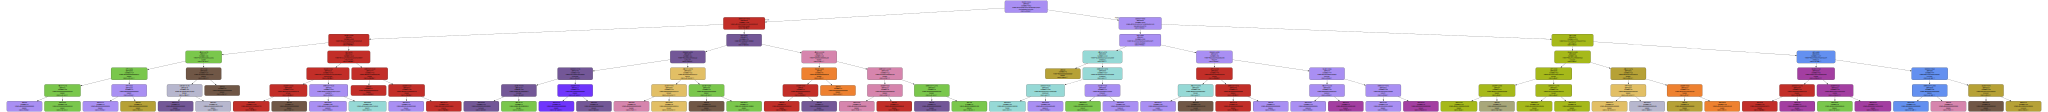

In [16]:
SVG(output_svg_file)

#### Entrenando con una distribución 70-30

Mejores hiperparámetros: {'max_depth': 9, 'min_samples_leaf': 9, 'min_samples_split': 2}


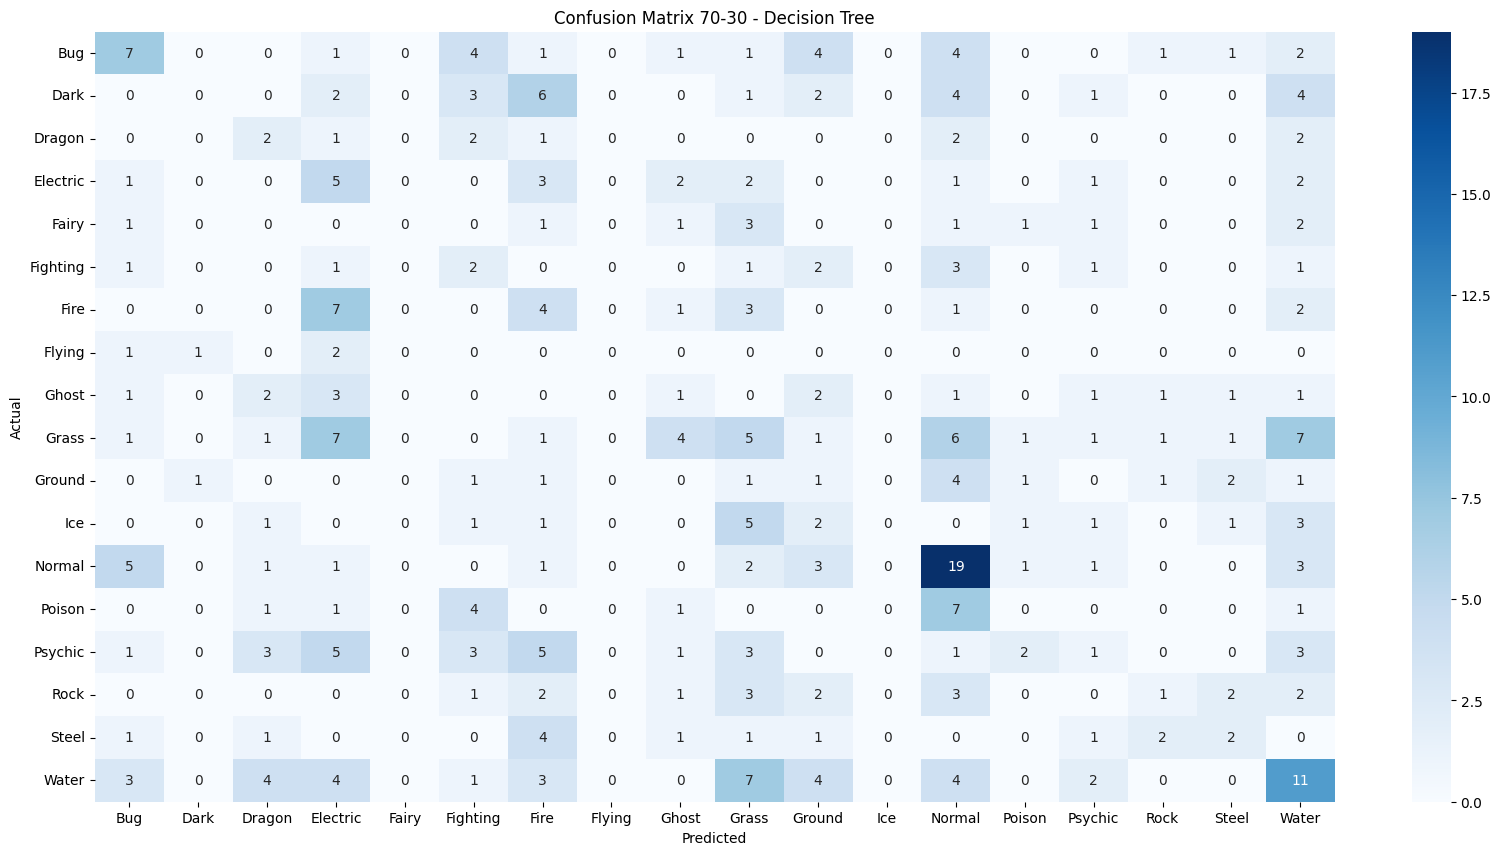

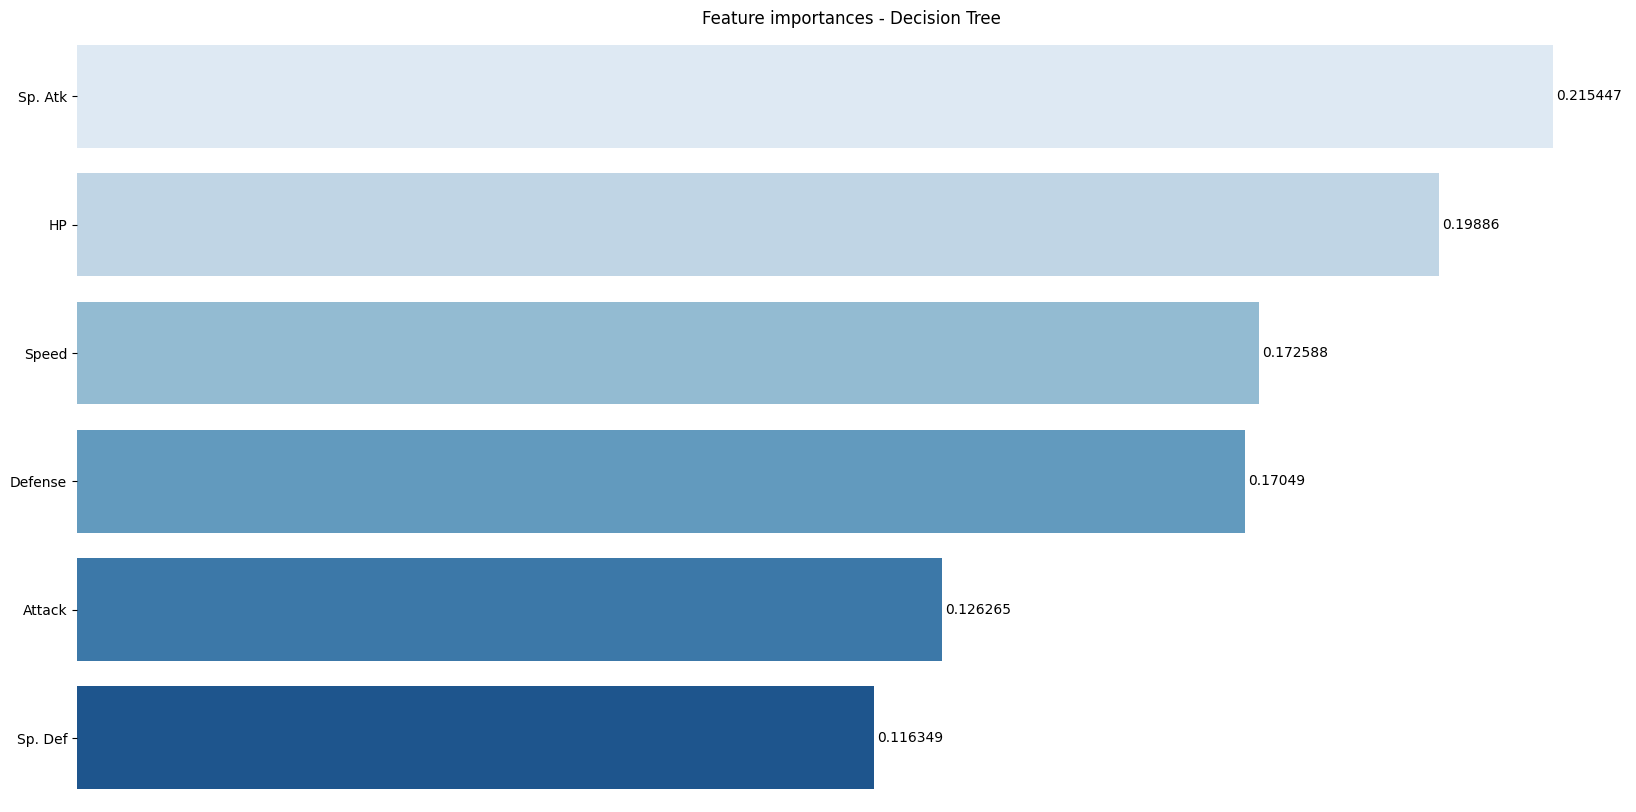

Accuracy: 0.17086834733893558
F1 Score: 0.1482917044233707


In [17]:
x = np.array(pokedex[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])
y = np.array(pokedex['Type'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

param_grid = {
    'max_depth': [x for x in range(5, 16)],
    'min_samples_leaf': [x for x in range(1, 11)],
    'min_samples_split': [2, 5, 10],
}

tree_clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(tree_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

best_tree_clf = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'], random_state=42)
best_tree_clf.fit(x_train, y_train)

y_pred = best_tree_clf.predict(x_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
plt.figure(figsize=(20, 10))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=best_tree_clf.classes_, yticklabels=best_tree_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix 70-30 - Decision Tree')
plt.show()

features_df = pd.DataFrame({'features': ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], 'importances': best_tree_clf.feature_importances_ })

# Ordeno en base a la importancia
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

plt.figure(figsize=(20, 10))

g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="Blues")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

plt.show()

export_graphviz(best_tree_clf, out_file="pokemon_best.dot",
            feature_names=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
            class_names=list(pokedex['Type'].unique()),
            rounded=True, filled=True)

with open("pokemon_best.dot") as dot_file:
    dot_data = dot_file.read()
    dot_lines = dot_data.splitlines()

    # Expresión regular para encontrar la clase en cada nodo
    patron = r'class = (\w+)'

    # Buscar y extraer la clase para cada nodo y hacer el cambio en el renglón
    for i, line in enumerate(dot_lines):
        match = re.search(patron, line)
        if match:
            clase = match.group(1)
            if clase in clases_pokemon_con_emojis:
                color = colors[clase]
                nuevo_nombre = clases_pokemon_con_emojis[clase]
                contenido_etiqueta = line.split('label="')[1].split('"')[0]
                contenido_etiqueta_modificado = contenido_etiqueta.replace(f'class = {clase}', f'class = {nuevo_nombre}')
                linea_modificada = line.replace(contenido_etiqueta, contenido_etiqueta_modificado)
                contenido_etiqueta1 = linea_modificada.split('fillcolor="')[1].split('"')[0]
                linea_modificada1 = linea_modificada.replace(contenido_etiqueta1, color)
                dot_lines[i] = linea_modificada1

# Reconstruir el archivo DOT con los cambios en los renglones
dot_data = '\n'.join(dot_lines)

with open("pokemon_best.dot", "w", encoding="utf-8") as dot_file:
    dot_file.write(dot_data)

# Ruta al archivo DOT de entrada
input_dot_file = "pokemon_best.dot"

# Ruta al archivo SVG de salida
output_svg_file = "output.svg"

# Comando para generar el archivo SVG a partir del archivo DOT
command = f"dot -T svg -o {output_svg_file} -Gsize=1600,800 {input_dot_file}"

# Ejecutar el comando
subprocess.call(command, shell=True)

# Cambiar el tamaño de la imagen SVG directamente en el archivo
with open(output_svg_file, 'r', encoding="utf-8") as svg_file:
    svg_content = svg_file.read()

with open(output_svg_file, 'w', encoding="utf-8") as svg_file:
    svg_file.write(svg_content)

SVG(output_svg_file)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

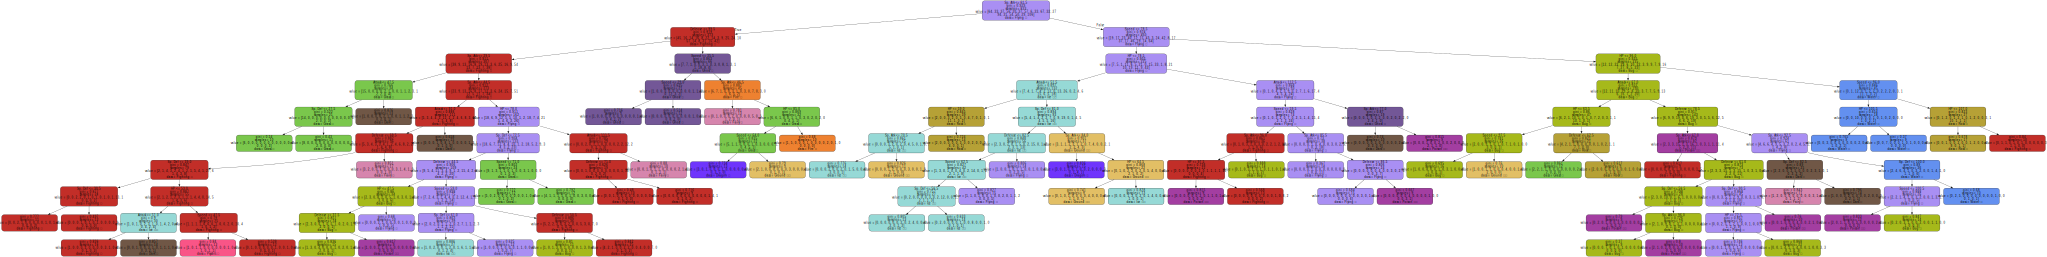

In [18]:
SVG(output_svg_file)

---

<div style="text-align: justify;">

### **Resultados del Árbol de Decisión:**

Con el árbol de decisión se obtuvo una **precisión de 0.13** para un entrenamiento 80-20 y un **0.17** para un entrenamiento 70-30. Independientemente de la mejora para el segundo caso, estos resultados indican que el modelo no es muy bueno.

Esto se debe a que el dataset no está nivelado, por lo que el modelo se inclina a predecir los tipos de Pokémon más comunes, en este caso <span style="color: #6890F0;">Agua</span>, <span style="color: #A8A878;">Normal</span> y <span style="color: #78C850;">Hierba</span>.

La matriz de correlación también se ve sesgada hacia estos tipos de Pokémon, lo que afecta negativamente a la precisión del modelo. En ambos casos, los atributos que más influyen en la predicción son el **ataque especial** y el **HP**, lo cual tiene sentido debido a que estos atributos son los que más varían entre los tipos de Pokémon.

Mientras tanto, la **defensa especial** y el **ataque** son los que menos influyen, lo que también tiene sentido ya que estos atributos no varían mucho entre los tipos de Pokémon.

*En resumen, el desafío principal radica en el desequilibrio del conjunto de datos, lo que afecta la capacidad del modelo para generalizar efectivamente a través de todos los tipos de Pokémon.*

</div>

---

## Bayes Ingenuo

### Discretización de parámetros

In [19]:
pokedex.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,70.852941,80.957983,74.586555,72.756303,72.050420,69.695798
std,26.886443,32.119650,30.718212,32.658636,27.637522,30.204376
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,51.250000,56.000000,51.000000,50.000000,50.000000,45.000000
50%,70.000000,80.000000,70.000000,65.000000,70.000000,67.000000
75%,85.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


Para discretizar los atributos consideramos dividirlos en 5 segmentos correspondientes al 20% cada uno. Dichos segmentos se identificarán con las etiquetas de 1 a 5, luego se asigna cada atributo del pokémon al segmento que le corresponda.

In [20]:
pokedex_discretizada = pokedex.copy()
for i in ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
    pokedex_discretizada[i] = pd.qcut(pokedex_discretizada[i], 5, labels=["Muy Bajo", "Bajo", "Medio", "Alto", "Muy Alto"])
pokedex_discretizada

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Muy Bajo,Muy Bajo,Muy Bajo,Medio,Medio,Bajo
1,Ivysaur,Grass,Bajo,Bajo,Bajo,Alto,Alto,Bajo
2,Venusaur,Grass,Alto,Medio,Alto,Alto,Muy Alto,Alto
3,Venusaur,Grass,Alto,Alto,Muy Alto,Muy Alto,Muy Alto,Alto
4,Charmander,Fire,Muy Bajo,Muy Bajo,Muy Bajo,Bajo,Muy Bajo,Medio
...,...,...,...,...,...,...,...,...
1185,Chi-Yu,Dark,Bajo,Medio,Alto,Muy Alto,Muy Alto,Muy Alto
1186,Roaring Moon,Dragon,Muy Alto,Muy Alto,Medio,Bajo,Muy Alto,Muy Alto
1187,Iron Valiant,Fairy,Medio,Muy Alto,Alto,Muy Alto,Bajo,Muy Alto
1188,Koraidon,Fighting,Muy Alto,Muy Alto,Muy Alto,Alto,Muy Alto,Muy Alto


#### Entrenando con una distribución 80-20

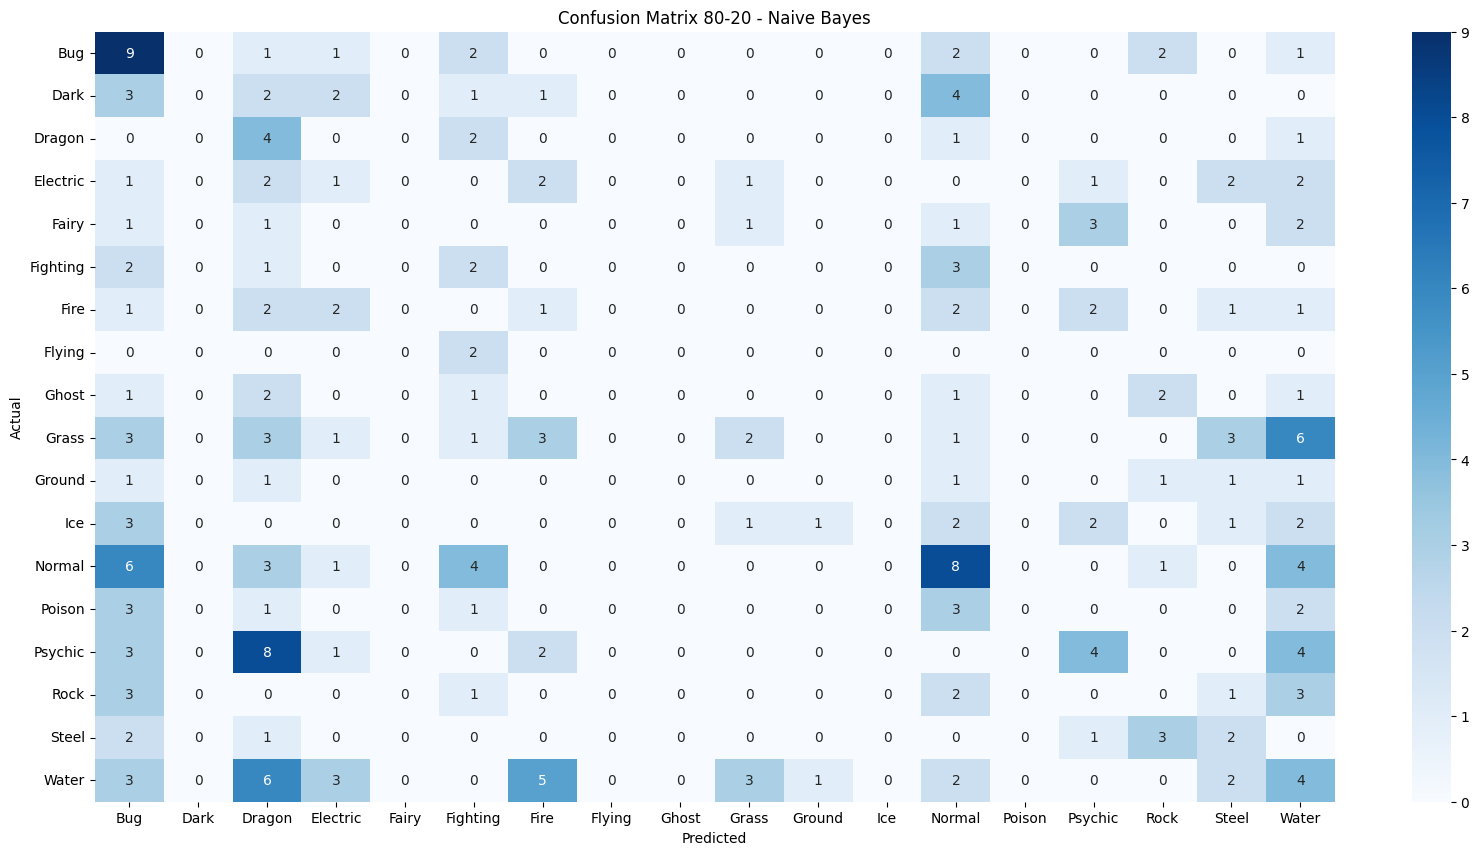

Precisión:  0.09162677134813357
Sensibilidad (Recall):  0.130105051290292
Precisión Global:  0.15546218487394958


In [21]:
x = np.array(pokedex_discretizada[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].apply(lambda x: x.cat.codes, axis=0))
y = np.array(pokedex_discretizada['Type'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

nb = GaussianNB()

nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix 80-20 - Naive Bayes')
plt.show()

precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precisión: ", precision)
print("Sensibilidad (Recall): ", recall)
print("Precisión Global: ", accuracy)

#### Entrenando con una distribución 70-30

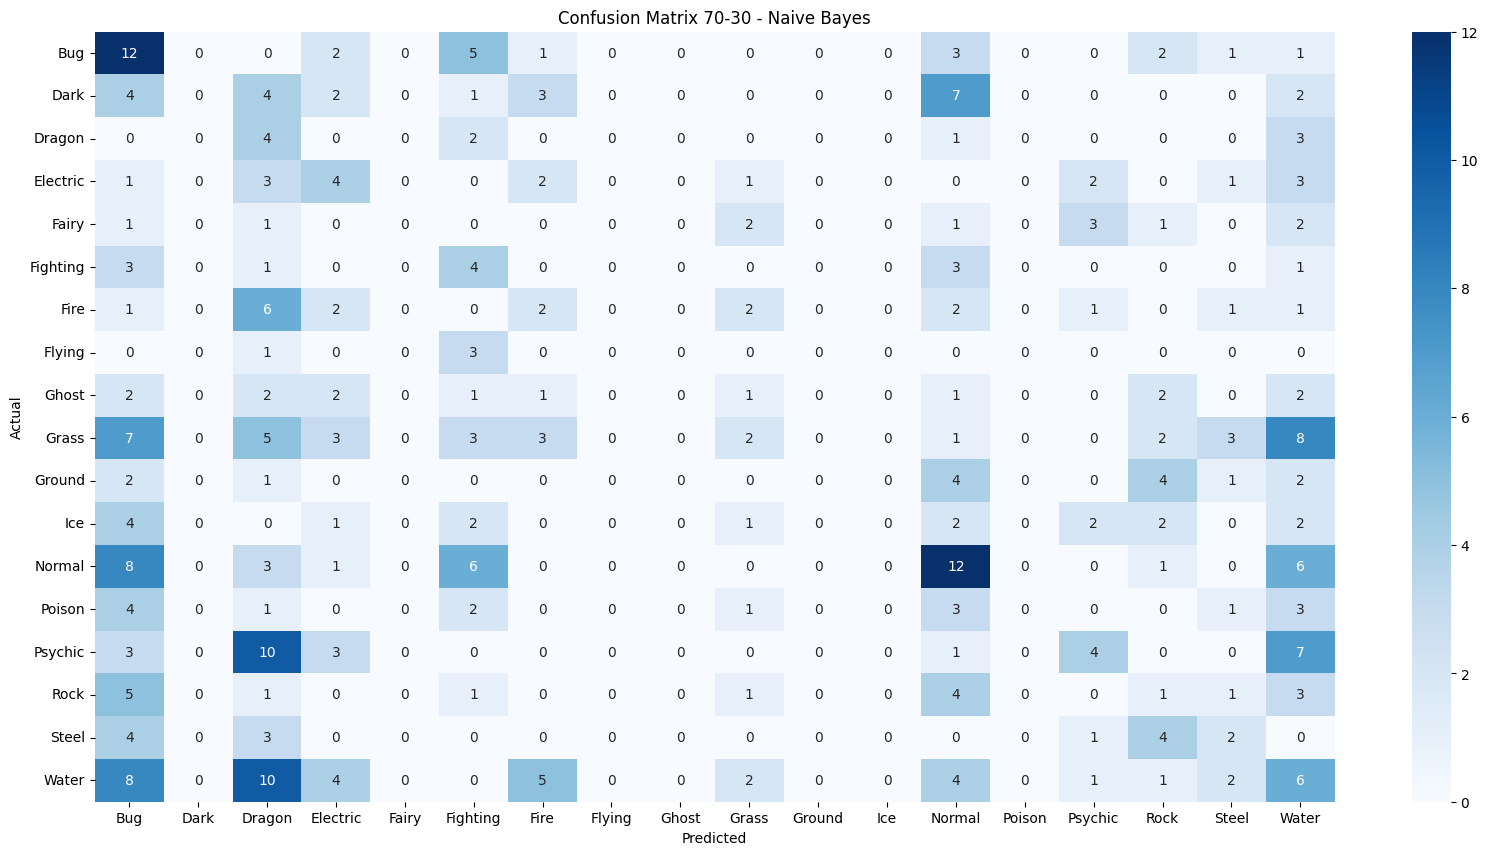

Precisión:  0.09259321342806912
Sensibilidad (Recall):  0.1325907824311837
Precisión Global:  0.1484593837535014


In [22]:
x = np.array(pokedex_discretizada[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].apply(lambda x: x.cat.codes, axis=0))
y = np.array(pokedex_discretizada['Type'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

nb = GaussianNB()

nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix 70-30 - Naive Bayes') 
plt.show()

precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precisión: ", precision)
print("Sensibilidad (Recall): ", recall)
print("Precisión Global: ", accuracy)

---

<div style="text-align: justify;">

### **Análisis de los Resultados con Bayes Ingenuo:**

Los resultados obtenidos al aplicar el modelo de Bayes Ingenuo para la estimación de tipos de Pokémon muestran un desempeño limitado en ambos escenarios de entrenamiento (80-20 y 70-30).

En el caso del entrenamiento 80-20, la precisión alcanza aproximadamente el 9.16%, lo que significa que el modelo acierta en la clasificación de los tipos de Pokémon alrededor de un 9.16% de las veces. La sensibilidad (recall) indica que el modelo logra capturar alrededor del 13.01% de los casos positivos. La precisión global, que considera tanto verdaderos positivos como verdaderos negativos, se sitúa en el 15.55%.

En el escenario de entrenamiento 70-30, los resultados no muestran mejoras significativas. La precisión, sensibilidad y precisión global alcanzan valores cercanos al 9.26%, 13.26%, y 14.85%, respectivamente.

Estos resultados sugieren que el modelo de Bayes Ingenuo enfrenta dificultades para realizar predicciones precisas sobre los tipos de Pokémon. La baja precisión y sensibilidad podrían indicar que el modelo no logra capturar de manera efectiva las relaciones entre los atributos de los Pokémon y sus tipos correspondientes.

Es crucial considerar la complejidad del conjunto de datos de Pokémon, donde la diversidad de tipos y atributos podría requerir enfoques más avanzados para obtener un rendimiento óptimo en la tarea de clasificación.

</div>

---

## KNN 

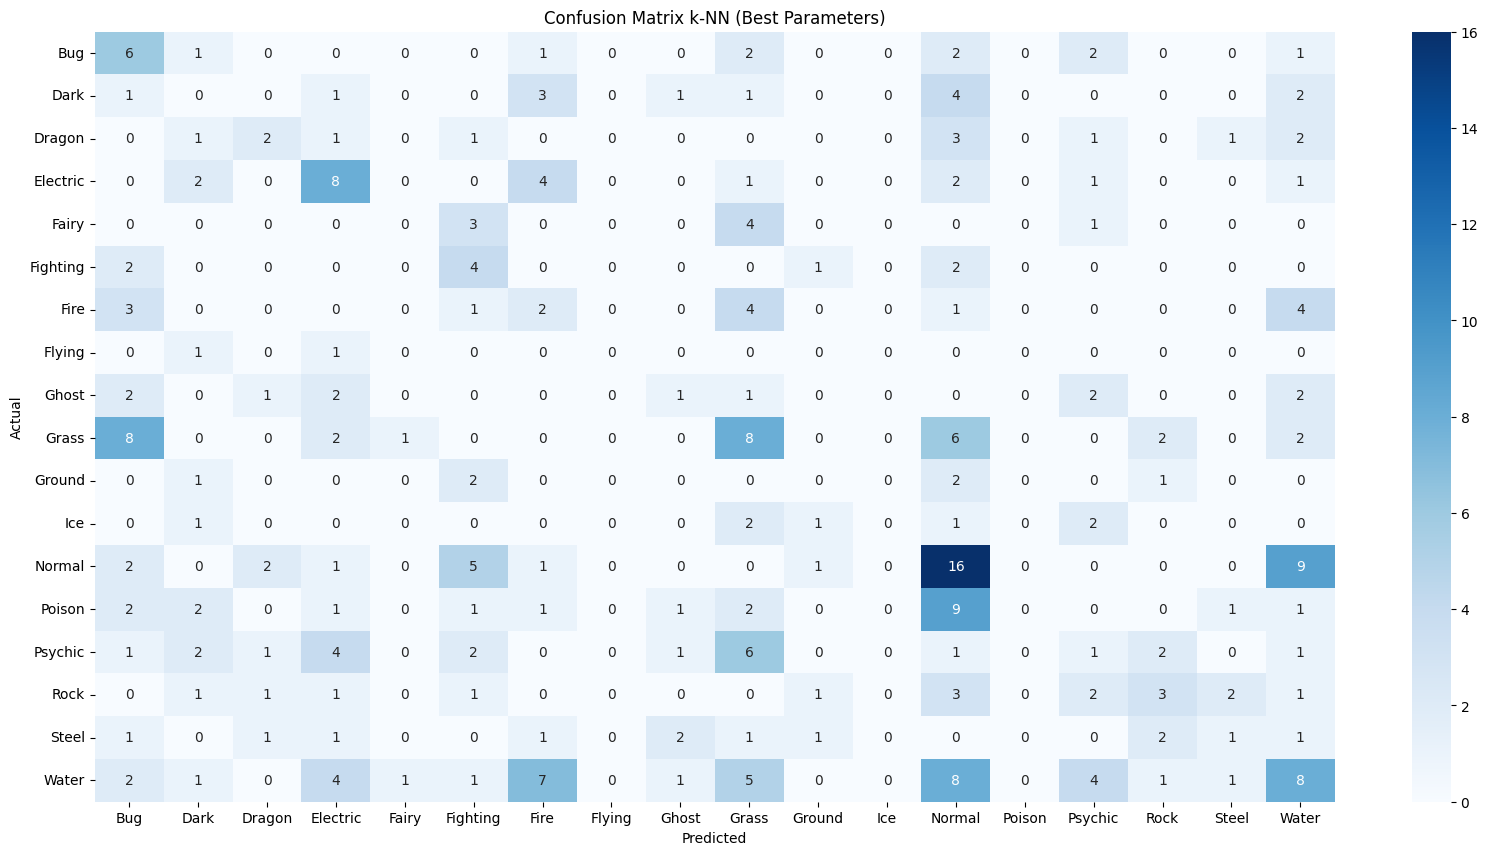

Mejores parámetros: {'metric': 'euclidean', 'n_neighbors': 18, 'p': 1}
Precisión con el mejor modelo: 0.13294321558210448
Sensibilidad (Recall) con el mejor modelo: 0.1590448182742496
Precisión Global con el mejor modelo: 0.20134228187919462


In [23]:
x = np.array(pokedex[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])
y = np.array(pokedex['Type'])
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 100)

# Definir el rango de valores de k, p y metric que deseas probar
param_grid = {
    'n_neighbors': range(1, 21),
    'p': [1, 2],  # Valores típicos para p en la métrica Minkowski
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Crear el modelo k-NN
knn = KNeighborsClassifier()

# Configurar el validador cruzado
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_

# Crear un nuevo modelo k-NN con los mejores parámetros
best_knn = KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'],
    p=best_params['p'],
    metric=best_params['metric']
)
best_knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_best = best_knn.predict(X_test)

# Calcular la matriz de confusión con el mejor modelo
cm_best = metrics.confusion_matrix(y_test, y_pred_best)

# Visualización de la matriz de confusión con el mejor modelo
plt.figure(figsize=(20, 10))
sns.heatmap(cm_best, annot=True, cmap='Blues', xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix k-NN (Best Parameters)')
plt.show()

# Métricas con el mejor modelo
precision_best = metrics.precision_score(y_test, y_pred_best, average='macro')
recall_best = metrics.recall_score(y_test, y_pred_best, average='macro')
accuracy_best = metrics.accuracy_score(y_test, y_pred_best)

print("Mejores parámetros:", best_params)
print("Precisión con el mejor modelo:", precision_best)
print("Sensibilidad (Recall) con el mejor modelo:", recall_best)
print("Precisión Global con el mejor modelo:", accuracy_best)


---

<div style="text-align: justify;">

### **Análisis de los Resultados con K-Nearest Neighbors (KNN):**

Los mejores parámetros obtenidos para el modelo KNN son {'metric': 'euclidean', 'n_neighbors': 18, 'p': 1}. Utilizando estos parámetros, se logra una precisión del 13.29%, una sensibilidad (recall) del 15.90%, y una precisión global del 20.13%.

Estos resultados indican que el modelo KNN, con la configuración óptima de parámetros, mejora ligeramente en comparación con el Bayes Ingenuo. Sin embargo, sigue evidenciando desafíos significativos en la tarea de clasificación de tipos de Pokémon.

Es importante destacar que, a pesar de los esfuerzos para ajustar los parámetros, la precisión general sigue siendo baja. Este rendimiento podría sugerir que el modelo KNN enfrenta dificultades para generalizar patrones en el conjunto de datos de Pokémon, donde la diversidad de tipos y atributos puede ser un factor influyente.

</div>

---

<div style="text-align: justify;">

### **Conclusiones Finales:**

La evaluación de diversos modelos para la estimación de tipos de Pokémon revela un panorama desafiante, donde la relación entre el tipo de Pokémon y sus atributos no es clara ni directa. Se destacan las siguientes observaciones:

- **Árboles de Decisión:** A pesar de identificar patrones significativos, los árboles de decisión enfrentan dificultades para manejar la diversidad de tipos de Pokémon en el conjunto de datos desbalanceado. La baja precisión sugiere que no hay reglas simples que definan la clasificación de los tipos.

- **Bayes Ingenuo:** El bajo rendimiento del modelo de Bayes Ingenuo indica la falta de dependencias lineales claras entre los atributos y los tipos de Pokémon. La baja capacidad de generalización sugiere que las relaciones son más complejas y no pueden ser capturadas por un modelo ingenuo.

- **K-Nearest Neighbors (KNN):** Aunque KNN mejora ligeramente la precisión, la baja precisión general refuerza la idea de que la relación entre atributos y tipos es compleja y no se ajusta fácilmente a un modelo de vecinos más cercanos.

Entre las principales causas de los bajos rendimientos de los modelos se encuentran:

La distribución desigual de los tipos de Pokémon, donde <span style="color: #6890F0;">Agua</span>, <span style="color: #A8A878;">Normal</span>, y <span style="color: #78C850;">Hierba</span> son más comunes, también influye en la dificultad de los modelos para generalizar efectivamente.

En general, la ausencia de una relación clara entre el tipo de Pokémon y sus atributos se evidencia en la dificultad de los modelos para lograr una precisión significativa. Por ejemplo, encontramos Pokémon del tipo <span style="color: #F8D030;">Dragón</span> con un HP más alto, o también observamos que los Pokémon de tipo <span style="color: #F8D030;">Eléctrico</span> son significativamente más veloces pero esta tendencia no es consistente para todos los tipos. La complejidad de las interacciones entre atributos hace que la clasificación sea un desafío.

</div>

___